###Importe de base de datos

In [1]:
import numpy as np
import tensorflow as tf
import math
import random
from matplotlib import pyplot as plt
from urllib import request
from sklearn.metrics import ConfusionMatrixDisplay

### Algoritmo K-Means

In [2]:
class KMeans:

    def __init__(self):
        self.centroids = []

    def train(self, samples, num_clusters, max_iter, initial_centroids=None):
        centroids = initial_centroids if initial_centroids else random.sample(samples, num_clusters)
        clusters = [[] for i in range(num_clusters)]
        for i in range(max_iter):
            aux_centroids = []
            for sample in samples:
                np.argmin(np.linalg.norm(a - b, axis = -1), axis = 1)
                distances = []
                for centroid in centroids:
                    distances.append(np.linalg.norm(np.array(centroid) - np.array(sample)))
                clusters[np.argmin(distances)].append(sample)
            for cluster in clusters:
                mid_point = sum(map(np.array, cluster)) / len(cluster)
                aux_centroids.append(tuple(mid_point))
            if sorted(aux_centroids) == sorted(centroids):
                break
            centroids = aux_centroids
        self.centroids = centroids
        return self.centroids

    def process(self, sample):
        distances = []
        for centroid in self.centroids:
            distances.append(np.linalg.norm(np.array(centroid) - np.array(sample)))
        return np.argmin(distances)

### Carga base de datos y normalización

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (validation_images, validation_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
ntr = train_images.shape[0] 
dx = train_images.shape[1]*train_images.shape[2]

### Autoencoder

In [5]:
model = tf.keras.models.load_model('fashion_mnist_autoencoder.h5')

OSError: ignored

### Aplico K-Means

In [ ]:
kmeans = KMeans()
samples = list(map(tuple, model.predict(train_images).reshape(60000, 28 * 28)))

1875/1875 [==============================] - 3s 2ms/step


In [ ]:
centroids = kmeans.train(samples, 10, 20)

In [ ]:
cluster_index = [kmeans.process(x) for x in samples]

In [ ]:
print(cluster_index)

[2, 3, 8, 8, 6, 1, 4, 1, 8, 9, 3, 5, 4, 4, 4, 2, 0, 3, 1, 8, 6, 0, 6, 2, 7, 6, 3, 1, 7, 1, 4, 8, 7, 8, 8, 9, 9, 8, 0, 7, 7, 4, 2, 4, 2, 7, 4, 6, 3, 6, 0, 0, 4, 1, 8, 3, 3, 9, 0, 0, 9, 8, 4, 4, 6, 1, 3, 6, 7, 0, 7, 0, 8, 6, 0, 6, 6, 3, 0, 2, 0, 8, 4, 4, 2, 4, 0, 4, 2, 4, 4, 8, 8, 2, 6, 9, 8, 0, 0, 2, 5, 6, 0, 0, 9, 2, 0, 2, 4, 2, 2, 4, 7, 8, 8, 8, 9, 5, 8, 4, 4, 4, 2, 8, 1, 7, 4, 8, 7, 0, 2, 4, 4, 4, 8, 1, 2, 0, 4, 7, 7, 4, 4, 0, 2, 4, 0, 7, 4, 3, 2, 6, 4, 4, 3, 4, 5, 1, 4, 7, 6, 2, 4, 0, 8, 4, 8, 4, 7, 7, 0, 3, 9, 4, 0, 4, 3, 4, 2, 7, 3, 7, 4, 8, 5, 7, 6, 8, 7, 4, 6, 3, 4, 2, 7, 0, 0, 1, 4, 1, 8, 4, 8, 7, 7, 7, 3, 8, 2, 0, 4, 6, 5, 2, 5, 8, 2, 4, 1, 3, 5, 4, 6, 0, 4, 3, 1, 2, 7, 4, 4, 1, 6, 5, 1, 9, 4, 3, 7, 5, 7, 1, 7, 6, 4, 6, 2, 8, 6, 4, 8, 8, 9, 1, 5, 7, 8, 4, 4, 0, 9, 8, 8, 1, 7, 2, 1, 9, 6, 1, 4, 7, 3, 1, 8, 4, 7, 8, 0, 4, 8, 1, 4, 0, 2, 0, 8, 6, 4, 1, 1, 8, 8, 8, 4, 2, 4, 1, 0, 2, 4, 1, 8, 4, 3, 0, 1, 0, 0, 1, 4, 1, 1, 9, 7, 6, 1, 4, 3, 4, 4, 3, 2, 6, 6, 8, 0, 8, 7, 3, 0, 3, 6, 

In [ ]:
clusters = [[] for i in range(10)]
for i in range(len(samples)):
  clusters[cluster_index[i]].append(np.array(samples[i]))

In [ ]:
clusters_mean = [(sum(cluster) / len(cluster)) for cluster in clusters]

In [ ]:
clusters_cov = [np.cov(cluster, rowvar = 0) for cluster in clusters]

In [ ]:
initial_points = [[-5, -5], [0, 0], [5, -5]]
distribution_list = []
for i in range(3):
  distribution_list.append(np.random.multivariate_normal(initial_points[i], np.eye(2), size=10000, check_valid='warn', tol=1e-8))

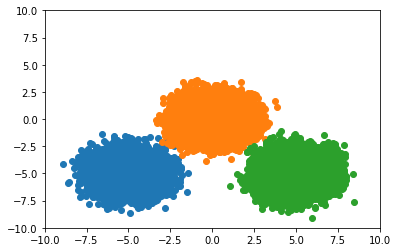

In [ ]:
for dist in distribution_list:
  plt.scatter(dist[:, 0], dist[:, 1])
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

In [ ]:
samples_2 = np.vstack(distribution_list)
np.random.shuffle(samples_2)
values_for_kmeans = [tuple(x) for x in samples_2]

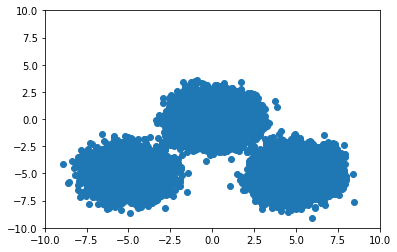

In [ ]:
plt.scatter(samples_2[:, 0], samples_2[:, 1])
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

In [ ]:
kmeans_2 = KMeans()
centroids_2 = kmeans_2.train(values_for_kmeans, 3, 200)

KeyboardInterrupt: ignored

In [ ]:
cluster_index_2 = [kmeans_2.process(x) for x in values_for_kmeans]
clusters_2 = [[] for i in range(3)]
for i in range(len(values_for_kmeans)):
  clusters_2[cluster_index_2[i]].append(np.array(values_for_kmeans[i]))

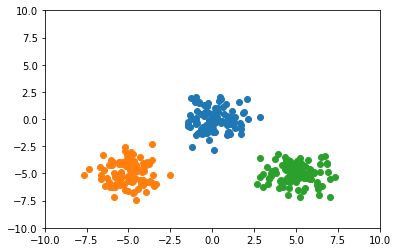

In [ ]:
for cluster in np.array(clusters_2):
  plt.scatter(cluster[:, 0], cluster[:, 1])
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
b = np.array([[1, 1, 1], [7, 8, 10]])

In [ ]:
a = a[:, None]
b = b[None, :]

In [ ]:
np.argmin(np.linalg.norm(a - b, axis = -1), axis = 1)

array([0, 1, 1])